In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder


In [423]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [424]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [425]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [426]:

test_passenger_id = test['PassengerId']
test = test.drop(['Name','Ticket','Cabin'], axis=1)

In [427]:
test.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [428]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [429]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [430]:
train['Age'] = train['Age'].fillna(train['Age'].mean())



In [431]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0],)

In [432]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [433]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].fillna(test['Fare'].mean())) # Corrected fillna for Fare

In [434]:
train.drop_duplicates(inplace=True)
# Removed test.drop_duplicates(inplace=True)

In [435]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       780 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  780 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [436]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.797600,0.525641,0.417949,34.829108
std,0.492657,0.854452,13.708883,0.988046,0.838536,52.263440
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.950000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [437]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [438]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [439]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']


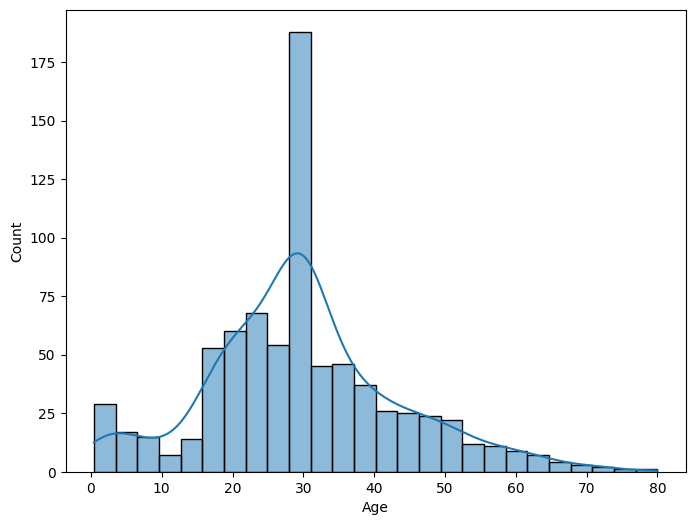

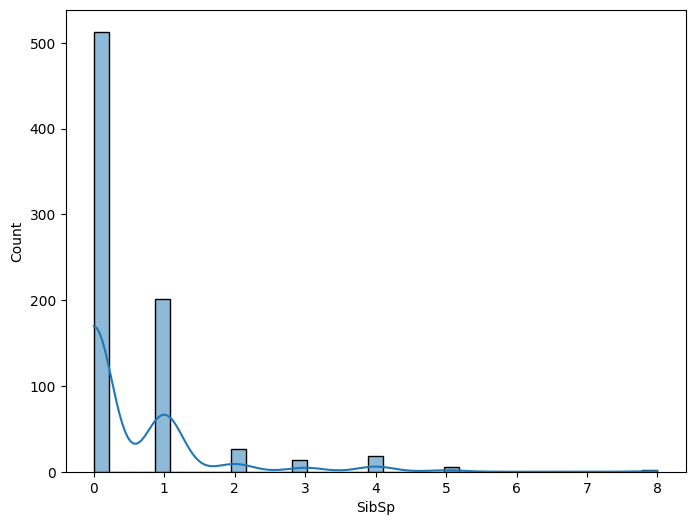

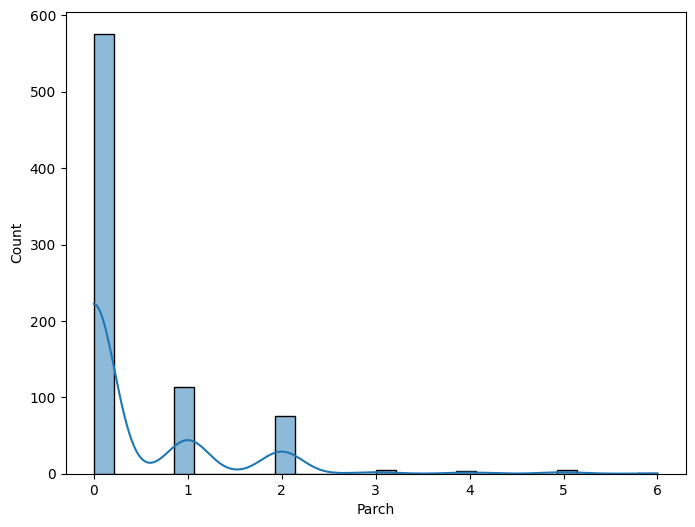

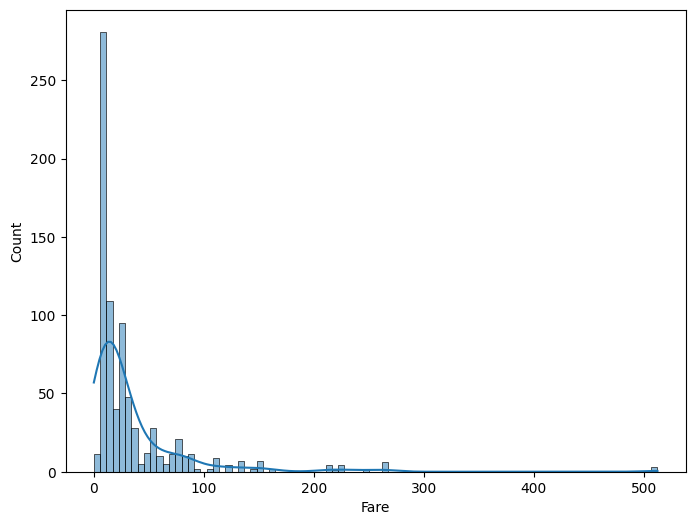

In [440]:
for col in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train[col], kde=True)
    plt.show()

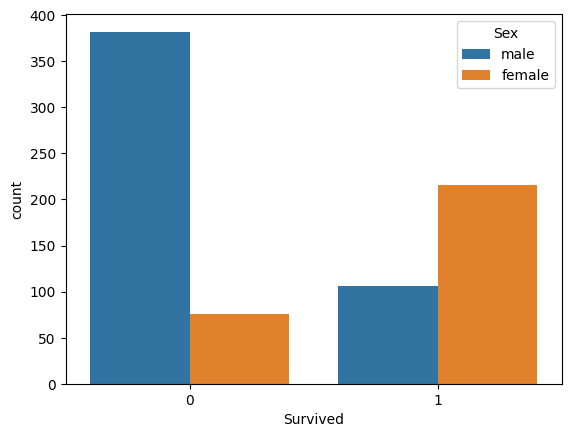

In [441]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.show()

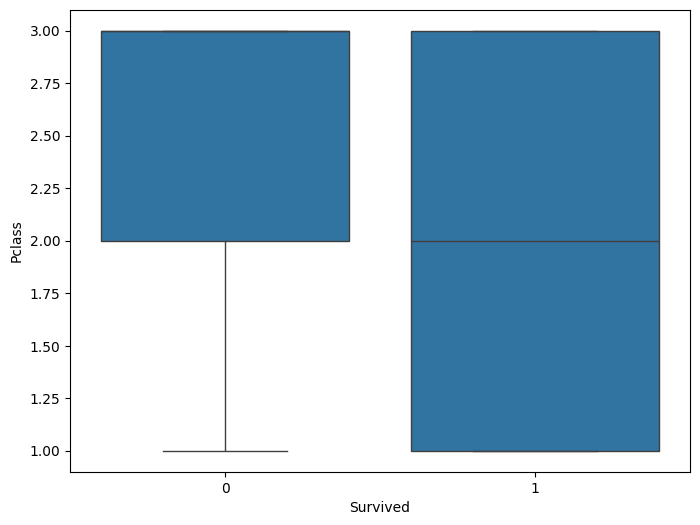

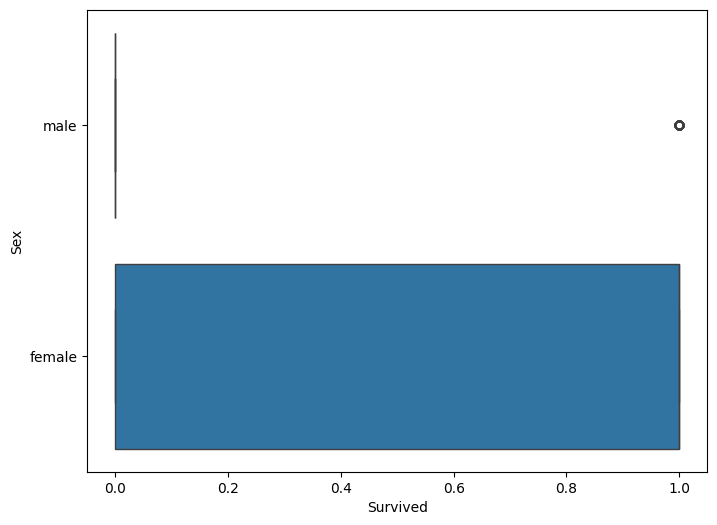

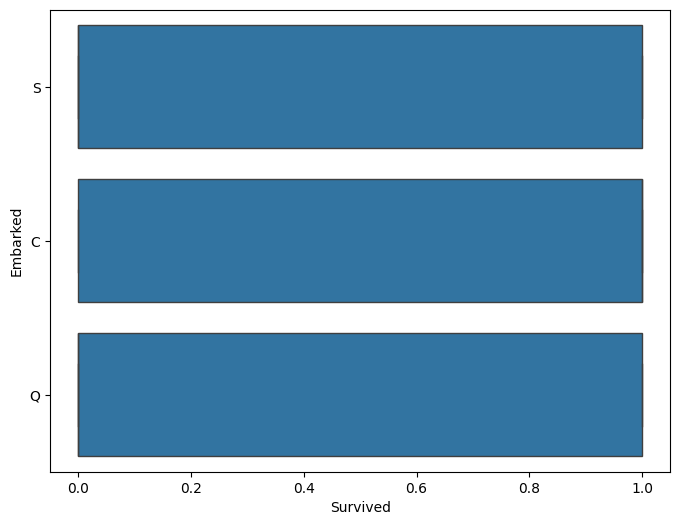

In [442]:
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Survived', y=col, data=train)
    plt.show()

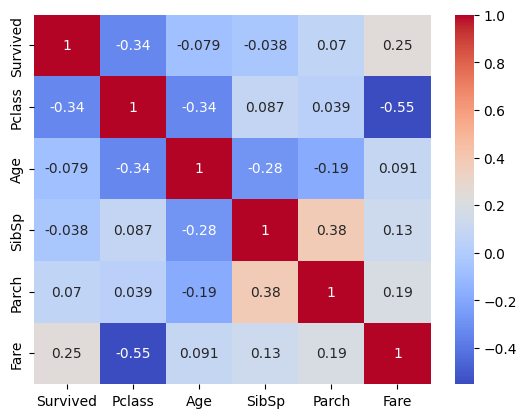

In [443]:
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [444]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [445]:
test.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [446]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [447]:
train=pd.get_dummies(train,columns=['Embarked'])
test=pd.get_dummies(test,columns=['Embarked'])
train=train.astype(int)
test=test.astype(int)

In [448]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7,0,0,1
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,1
4,0,3,0,35,0,0,8,0,0,1


In [449]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34,0,0,7,0,1,0
1,893,3,1,47,1,0,7,0,0,1
2,894,2,0,62,0,0,9,0,1,0
3,895,3,0,27,0,0,8,0,0,1
4,896,3,1,22,1,1,12,0,0,1


In [450]:
scaler = StandardScaler()
train[['Pclass', 'Age', 'Fare']] = scaler.fit_transform(train[['Pclass', 'Age', 'Fare']])
test[['Pclass', 'Age', 'Fare']] = scaler.transform(test[['Pclass', 'Age', 'Fare']])

In [451]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0.882823,0,-0.560680,1,0,-0.524709,0,0,1
1,1,-1.459361,1,0.606313,1,0,0.700373,1,0,0
2,1,0.882823,1,-0.268932,0,0,-0.524709,0,0,1
3,1,-1.459361,1,0.387501,1,0,0.355819,0,0,1
4,0,0.882823,0,0.387501,0,0,-0.505568,0,0,1


In [452]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,0.882823,0,0.314564,0,0,-0.524709,0,1,0
1,893,0.882823,1,1.262746,1,0,-0.524709,0,0,1
2,894,-0.288269,0,2.356802,0,0,-0.486426,0,1,0
3,895,0.882823,0,-0.195995,0,0,-0.505568,0,0,1
4,896,0.882823,1,-0.560680,1,1,-0.429000,0,0,1


In [467]:
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']
x_test=test.drop('PassengerId',axis=1)

In [468]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

importances = pd.Series(model.feature_importances_, index=x_train.columns)
importances = importances.sort_values(ascending=False)

print("Feature Importances:")
print(importances)

Feature Importances:
Age           0.296796
Sex           0.266424
Fare          0.203758
Pclass        0.105997
SibSp         0.052846
Parch         0.040374
Embarked_C    0.015089
Embarked_S    0.012834
Embarked_Q    0.005881
dtype: float64


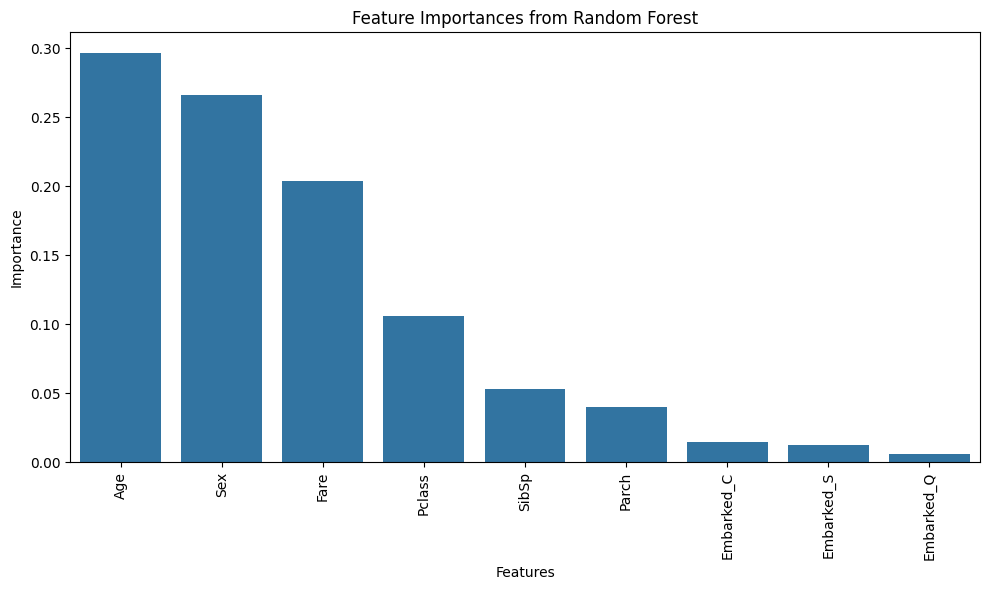

In [469]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.index, y=importances.values)
plt.xticks(rotation=90)
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [470]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [471]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, StratifiedKFold


In [538]:
import optuna
from sklearn.model_selection import cross_val_score

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'scale_pos_weight': scale,
        'eval_metric': 'logloss',
        'random_state': 42,
        'n_jobs': -1
    }
    model = XGBClassifier(**params)
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='f1')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=50)
print("Best parameters:", study.best_params)



[I 2025-10-31 16:39:29,148] A new study created in memory with name: no-name-659cdc14-5e3d-43d9-986a-bd600418e0fd
[I 2025-10-31 16:39:29,654] Trial 0 finished with value: 0.71969974037165 and parameters: {'n_estimators': 245, 'max_depth': 4, 'learning_rate': 0.1458429054714494, 'subsample': 0.8340999610725951, 'colsample_bytree': 0.8496472239783243}. Best is trial 0 with value: 0.71969974037165.
[I 2025-10-31 16:39:30,553] Trial 1 finished with value: 0.7227956336575222 and parameters: {'n_estimators': 375, 'max_depth': 8, 'learning_rate': 0.055408790330639605, 'subsample': 0.6152579063888484, 'colsample_bytree': 0.8884329473858368}. Best is trial 1 with value: 0.7227956336575222.
[I 2025-10-31 16:39:31,454] Trial 2 finished with value: 0.758610996846291 and parameters: {'n_estimators': 509, 'max_depth': 5, 'learning_rate': 0.013216664599528761, 'subsample': 0.870041089374296, 'colsample_bytree': 0.7659280968028537}. Best is trial 2 with value: 0.758610996846291.
[I 2025-10-31 16:39:32

Best parameters: {'n_estimators': 218, 'max_depth': 5, 'learning_rate': 0.0294979263315327, 'subsample': 0.888936795642082, 'colsample_bytree': 0.7508745119134499}


In [543]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Best params (from Optuna or manual tuning)
neg, pos = np.bincount(y_train)
scale = neg / pos
print("scale_pos_weight =", scale)

params = {
    'n_estimators': 218,
    'max_depth': 5,
    'learning_rate': 0.0294979263315327,
    'subsample': 0.888936795642082,
    'colsample_bytree': 0.7508745119134499,
    'random_state': 42,
    'eval_metric': 'logloss'
}

# Create model
xgb_model = XGBClassifier(**params)

# Train
xgb_model.fit(x_train, y_train)

# Predict
y_pred = xgb_model.predict(x_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


scale_pos_weight = 1.4280155642023347
Accuracy: 0.8076923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        91
           1       0.83      0.68      0.75        65

    accuracy                           0.81       156
   macro avg       0.81      0.79      0.80       156
weighted avg       0.81      0.81      0.80       156


Confusion Matrix:
 [[82  9]
 [21 44]]


In [545]:
y_proba = xgb_model.predict_proba(x_val)[:, 1]
y_pred_thresh = (y_proba >= 0.4).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, y_pred_thresh))
print(confusion_matrix(y_val, y_pred_thresh))


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        91
           1       0.78      0.72      0.75        65

    accuracy                           0.80       156
   macro avg       0.80      0.79      0.79       156
weighted avg       0.80      0.80      0.80       156

[[78 13]
 [18 47]]


In [547]:
y_proba = xgb_model.predict_proba(x_val)[:, 1]

for t in [0.3, 0.35, 0.4, 0.45, 0.5]:
    y_pred_t = (y_proba >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_val, y_pred_t, digits=3))



Threshold: 0.3
              precision    recall  f1-score   support

           0      0.841     0.813     0.827        91
           1      0.750     0.785     0.767        65

    accuracy                          0.801       156
   macro avg      0.795     0.799     0.797       156
weighted avg      0.803     0.801     0.802       156


Threshold: 0.35
              precision    recall  f1-score   support

           0      0.817     0.835     0.826        91
           1      0.762     0.738     0.750        65

    accuracy                          0.795       156
   macro avg      0.790     0.787     0.788       156
weighted avg      0.794     0.795     0.794       156


Threshold: 0.4
              precision    recall  f1-score   support

           0      0.812     0.857     0.834        91
           1      0.783     0.723     0.752        65

    accuracy                          0.801       156
   macro avg      0.798     0.790     0.793       156
weighted avg      0.800  

In [553]:
y_proba_test = xgb_model.predict_proba(x_test)[:, 1]
y_pred_test = (y_proba_test >= 0.35).astype(int)

submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived": y_pred_test
})
submission.to_csv("submission.csv", index=False)
